#                          <center> <div color = "blue">INTELLIGENCE ARTIFICIELLE</div> <br /><br /> PROJET IA for HumanForYou
</center>        





###                             <center> CESICDP GROUPE 2 </center>

#####  <center> Adrian SALAUM <br /><br /> Coralistone METSA<br /><br /> Romain COTTINEAU  <br /><br />Simon BRIFFAUD <br /><br /> </center>


##### ########################################################################################################################

##### ########################################################################################################################

##                     <center> <br />  I. RAPPEL DU CONTEXTE </center>                                                     

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

##               <center>  <br /> <br /> II. Pre-traitement des données et analyse exploratoire </center>   

Voici quelques étapes à suivre pour pré-traiter les données pour une utilisation avec K-means :

1. Intégration des données : Intégrez les données des différentes sources en une seule source de données. Si vous travaillez avec des données provenant de plusieurs sources, vous devez les intégrer en une seule source de données. Cela vous permettra de traiter les données comme une seule entité et de les analyser plus facilement.

1. Nettoyer les données : Assurez-vous que vos données sont propres et ne contiennent pas de valeurs manquantes, de doublons ou d'autres anomalies. Si nécessaire, supprimez ou remplacez les données manquantes.

2. Normaliser les données : Normalisez les données en les mettant à l'échelle de sorte que chaque variable ait une plage de valeurs comparable. La normalisation peut être effectuée en utilisant la méthode de la moyenne et de l'écart type, la méthode de la plage ou la méthode de la normalisation de l'amplitude.

3. Réduire la dimensionnalité : Si vous travaillez avec des données à haute dimensionnalité, utilisez des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) pour réduire la dimensionnalité de vos données et faciliter leur analyse.

4. Identifier les valeurs aberrantes : Les valeurs aberrantes peuvent fausser les résultats de K-means, il est donc important de les identifier et de les traiter correctement. Les valeurs aberrantes peuvent être supprimées ou remplacées par des valeurs plus appropriées.

5. Sélectionner les caractéristiques : Si vous travaillez avec des données qui contiennent de nombreuses caractéristiques, il peut être judicieux de sélectionner les caractéristiques les plus pertinentes pour votre analyse.

En résumé, le pré-traitement des données pour K-means comprend le nettoyage des données, la normalisation des données, la réduction de la dimensionnalité, l'identification et le traitement des valeurs aberrantes et la sélection des caractéristiques. En effectuant ces étapes, vous pouvez améliorer la qualité de vos données et obtenir des résultats plus significatifs à l'aide de K-means.

##  <center>  <br /> <br /> 1. Data wrangling </center>
Puisque les données proviennent d'un fichier CSV, nous utiliserons la fonction read_csv de Pandas pour charger les données dans un DataFrame.

### Ca c'est avant de charger les données.

In [76]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

DOWNLOAD_URLS = [
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/employee_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/general_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/in_time.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/manager_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/out_time.csv"
]
HOUSING_PATH = os.path.join("datasets", "employees")

def load_project_data(download_urls=DOWNLOAD_URLS, housing_path=HOUSING_PATH):    
    dataframes = {}
    
    for url in DOWNLOAD_URLS:
        file_name = url.split('/')[-1].split('.')[0]
        df = pd.read_csv(url, index_col=0)
        dataframes[file_name] = df
    
    return dataframes    

On vérifie si les données sont correctement chargées

In [77]:
data = load_project_data()
data.keys()

dict_keys(['employee_survey_data', 'general_data', 'in_time', 'manager_survey_data', 'out_time'])

On affiche la description des colonnes pour chaque jeu de données

In [78]:
for key in data.keys():
    print(data[key].info(), "\n"*3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3)
memory usage: 137.8 KB
None 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 51 to 40
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 

In [79]:
for key in data.keys():
    print(key+'\n', data[key].describe(), "\n"*3)

employee_survey_data
        EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count              4385.000000      4390.000000      4372.000000
mean                  2.723603         2.728246         2.761436
std                   1.092756         1.101253         0.706245
min                   1.000000         1.000000         1.000000
25%                   2.000000         2.000000         2.000000
50%                   3.000000         3.000000         3.000000
75%                   4.000000         4.000000         3.000000
max                   4.000000         4.000000         4.000000 



general_data
        DistanceFromHome    Education  EmployeeCount   EmployeeID     JobLevel  \
count       4410.000000  4410.000000         4410.0  4410.000000  4410.000000   
mean           9.192517     2.912925            1.0  2205.500000     2.063946   
std            8.105026     1.023933            0.0  1273.201673     1.106689   
min            1.000000     1.000000            1.0

On visualise les données

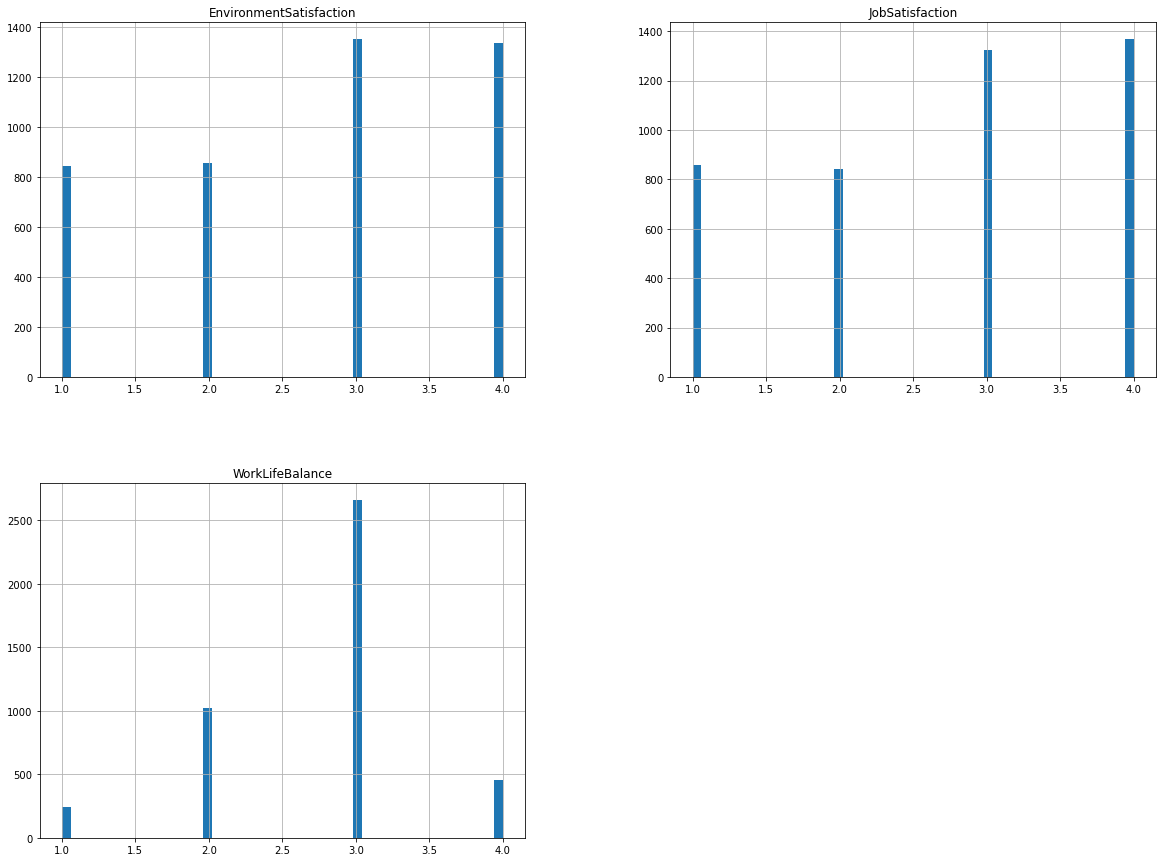

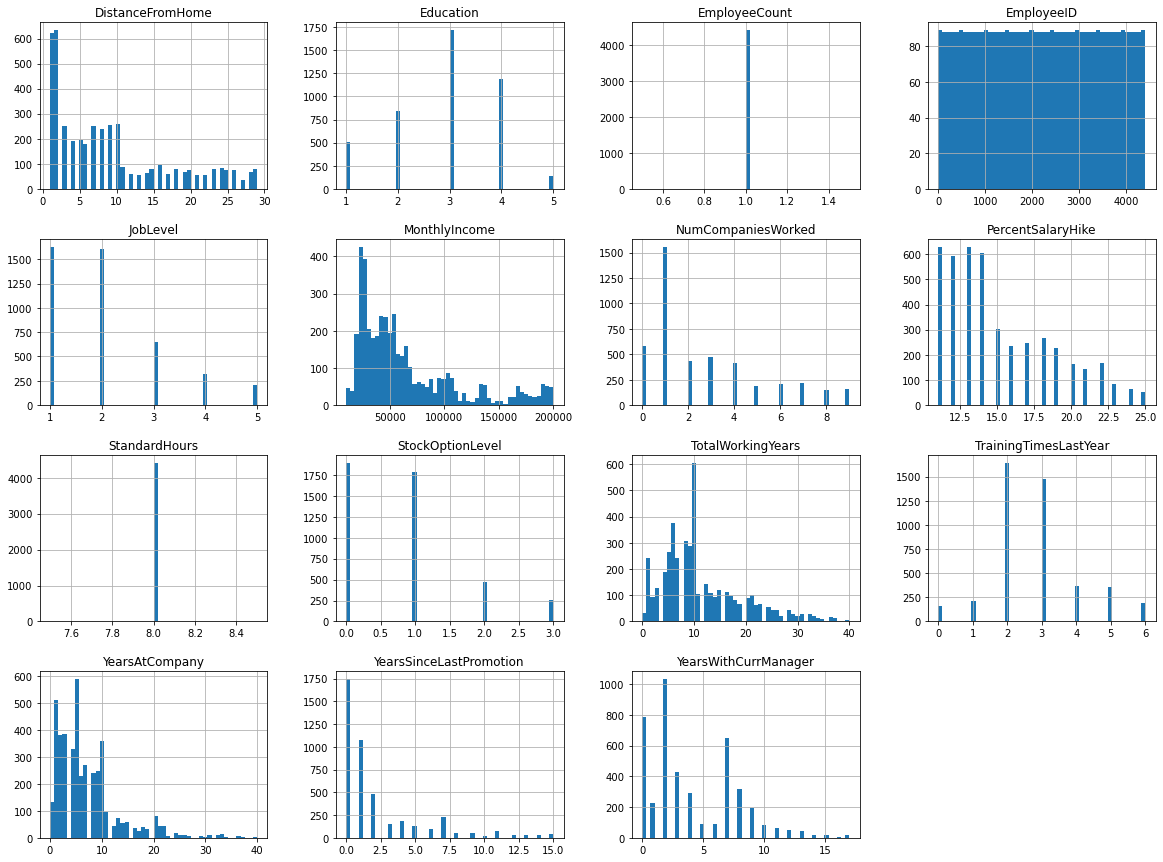

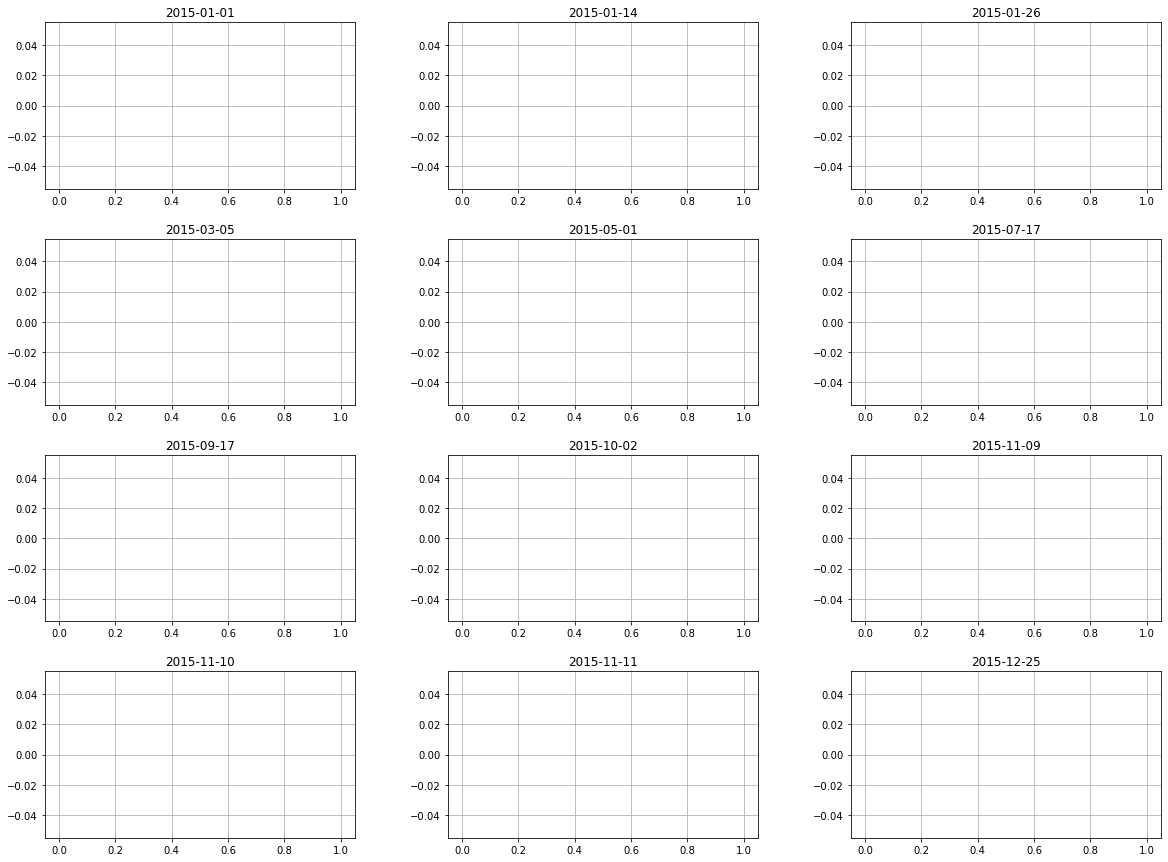

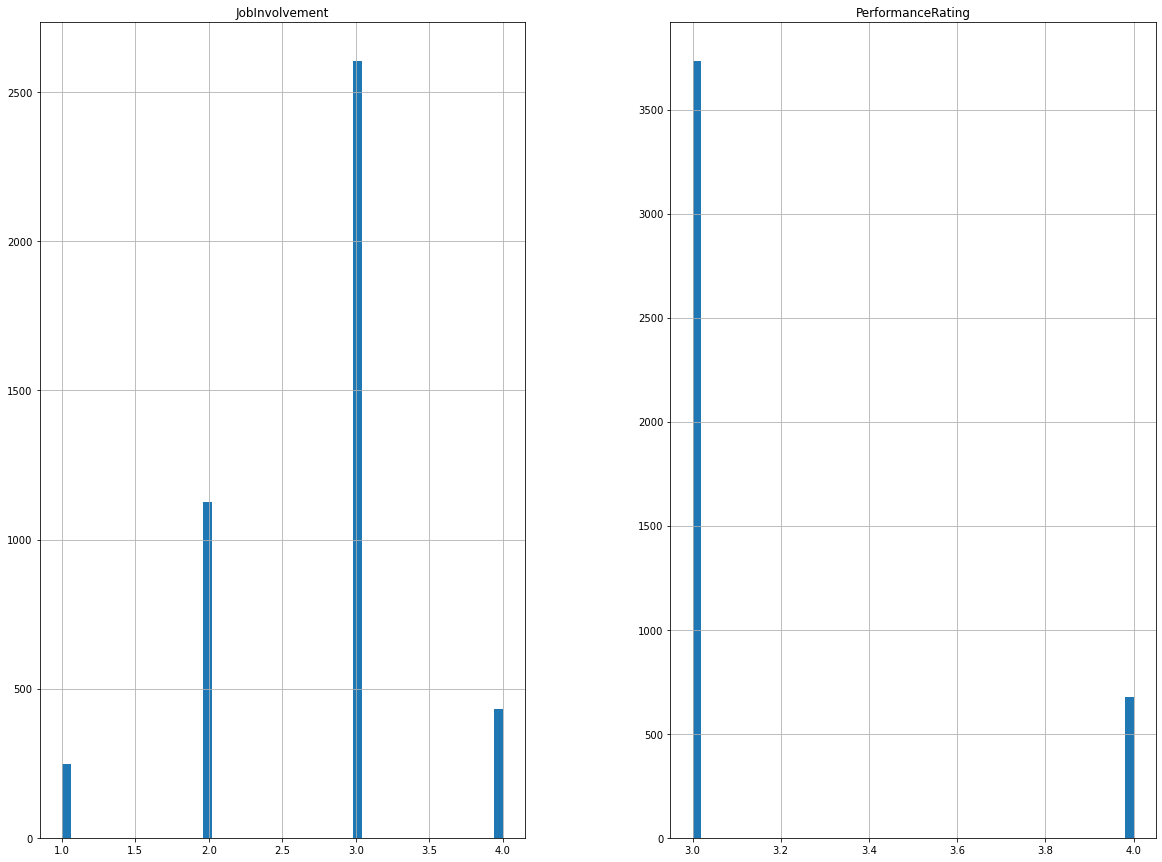

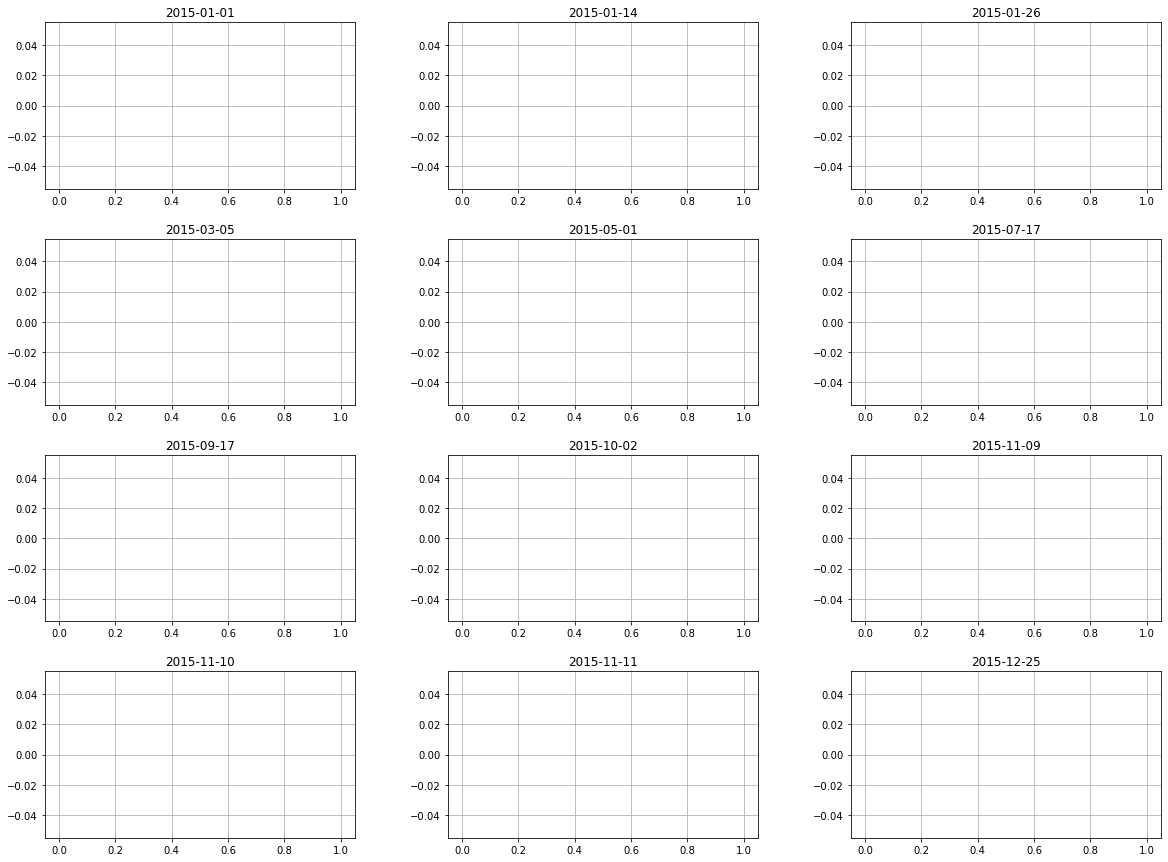

In [159]:
for df_name in data.keys():
    data[df_name].hist(bins=50, figsize=(20,15))
plt.show()

On retire les colonnes inutiles de la table "general_data"

In [151]:
gd = data["general_data"].copy()

gd.drop("MaritalStatus", axis=1, inplace=True)
gd.drop("Over18", axis=1, inplace=True)
gd.drop("StandardHours", axis=1, inplace=True)
gd.drop("StockOptionLevel", axis=1, inplace=True)
gd.drop("TrainingTimesLastYear", axis=1, inplace=True)
gd.drop("Gender", axis=1, inplace=True)

gd.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,
51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,Healthcare Representative,131160,1.0,11,1.0,1,0,0
31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,1,Research Scientist,41890,0.0,23,6.0,5,1,4
32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,4,Sales Executive,193280,1.0,15,5.0,5,0,3
38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,3,Human Resources,83210,3.0,11,13.0,8,7,5
32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,1,Sales Executive,23420,4.0,12,9.0,6,0,4


In [169]:
import numpy as np

it_copy = data["in_time"].copy()
ot_copy = data["out_time"].copy()

for column in it_copy:
    if it_copy[column].isnull().sum() == 4410:
        it_copy.drop(column, axis=1, inplace=True)

for column in ot_copy:
    if ot_copy[column].isnull().sum() == 4410:
        ot_copy.drop(column, axis=1, inplace=True)

#### On encode les données non-numériques

In [152]:
from sklearn.preprocessing import OrdinalEncoder

fields_to_change = [
    "Attrition",
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobRole"
]

fields_encoded = {}

for ftc in fields_to_change:
    field = gd[[ftc]]
    ordinal_encoder = OrdinalEncoder()
    field_encoded = ordinal_encoder.fit_transform(field)
    fields_encoded[ftc] = field_encoded

fields_encoded

{'Attrition': array([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]),
 'BusinessTravel': array([[2.],
        [1.],
        [1.],
        ...,
        [2.],
        [2.],
        [2.]]),
 'Department': array([[2.],
        [1.],
        [1.],
        ...,
        [1.],
        [2.],
        [1.]]),
 'EducationField': array([[1.],
        [1.],
        [4.],
        ...,
        [1.],
        [3.],
        [3.]]),
 'JobRole': array([[0.],
        [6.],
        [7.],
        ...,
        [7.],
        [2.],
        [2.]])}

#### On remplace les colonnes non numériques par les nouvelles colonnes numériques

In [153]:
for key in fields_encoded.keys():
    gd[key] = fields_encoded[key]

gd.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,
51,0.0,2.0,2.0,6,2,1.0,1,1,1,0.0,131160,1.0,11,1.0,1,0,0
31,1.0,1.0,1.0,10,1,1.0,1,2,1,6.0,41890,0.0,23,6.0,5,1,4
32,0.0,1.0,1.0,17,4,4.0,1,3,4,7.0,193280,1.0,15,5.0,5,0,3
38,0.0,0.0,1.0,2,5,1.0,1,4,3,1.0,83210,3.0,11,13.0,8,7,5
32,0.0,2.0,1.0,10,1,3.0,1,5,1,7.0,23420,4.0,12,9.0,6,0,4


#### On remplace les valeurs nulles ou non-existantes de chaque colonne par la valeur médiane de celle-ci

In [154]:
for column in gd.keys():
    median = gd[column].median()
    print(column, median)
    gd[column].fillna(median, inplace=True)

gd

Attrition 0.0
BusinessTravel 2.0
Department 1.0
DistanceFromHome 7.0
Education 3.0
EducationField 2.0
EmployeeCount 1.0
EmployeeID 2205.5
JobLevel 2.0
JobRole 5.0
MonthlyIncome 49190.0
NumCompaniesWorked 2.0
PercentSalaryHike 14.0
TotalWorkingYears 10.0
YearsAtCompany 5.0
YearsSinceLastPromotion 1.0
YearsWithCurrManager 3.0


,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,
51,0.0,2.0,2.0,6,2,1.0,1,1,1,0.0,131160,1.0,11,1.0,1,0,0
31,1.0,1.0,1.0,10,1,1.0,1,2,1,6.0,41890,0.0,23,6.0,5,1,4
32,0.0,1.0,1.0,17,4,4.0,1,3,4,7.0,193280,1.0,15,5.0,5,0,3
38,0.0,0.0,1.0,2,5,1.0,1,4,3,1.0,83210,3.0,11,13.0,8,7,5
32,0.0,2.0,1.0,10,1,3.0,1,5,1,7.0,23420,4.0,12,9.0,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.0,2.0,1.0,5,4,3.0,1,4406,1,6.0,60290,3.0,17,10.0,3,0,2
29,0.0,2.0,1.0,2,4,3.0,1,4407,1,2.0,26790,2.0,15,10.0,3,0,2
25,0.0,2.0,1.0,25,2,1.0,1,4408,2,7.0,37020,0.0,20,5.0,4,1,2


In [174]:
manager_survey_copy = data["manager_survey_data"].copy()

for column in manager_survey_copy.keys():
    median = manager_survey_copy[column].median()
    print(column, median)
    manager_survey_copy[column].fillna(median, inplace=True)

manager_survey_copy

JobInvolvement 3.0
PerformanceRating 3.0


,JobInvolvement,PerformanceRating
EmployeeID,,
1,3,3
2,2,4
3,3,3
4,2,3
5,3,3
...,...,...
4406,3,3
4407,2,3
4408,3,4


In [175]:
employee_survey_copy = data["employee_survey_data"].copy()

for column in employee_survey_copy.keys():
    median = employee_survey_copy[column].median()
    print(column, median)
    employee_survey_copy[column].fillna(median, inplace=True)

employee_survey_copy

EnvironmentSatisfaction 3.0
JobSatisfaction 3.0
WorkLifeBalance 3.0


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,3.0,4.0,2.0
2,3.0,2.0,4.0
3,2.0,2.0,1.0
4,4.0,4.0,3.0
5,4.0,1.0,3.0
...,...,...,...
4406,4.0,1.0,3.0
4407,4.0,4.0,3.0
4408,1.0,3.0,3.0


In [173]:
for column in it_copy:
    it_copy[column].fillna(0.0, inplace=True)

for column in ot_copy:
    ot_copy[column].fillna(0.0, inplace=True)

### Données de la dernière évaluation du manager

##               <center>  <br /> <br />  2. Création du jeu de test </center>   

##  <center>  <br /> <br /> 3. Étude des données </center>

##  <center>  <br /> <br /> 4. Analyse des données </center>

## <center>  <br /> <br /> 5. Nettoyer les données </center>

##  <center>  <br /> <br /> III. Choix de (des) l'algorithme(s) d'"IA" retenu(s) </center>


## justification des choix et les traitements effectués pour faire face aux problématiques classiques 


## <center>  <br /> <br /> IV. Analyse des résultats obtenus et leur interprétation </center>

##  <center>  <br /> <br /> V. démarche mise en œuvre pour améliorer un modèle  </center>

### <center>  <br /> <br />  1. les différents modèles effectués . </center>

### <center>  <br /> <br />  1.1   K-means . </center>

### <center>  <br /> <br />  1.2  Validation croisée . </center>

### <center>  <br /> <br />  1.3  Les autres algorithmes qu'on va tester. </center>

### <center>  <br /> <br />  2. choix du modèle retenu au final parmi les différents essais effectués en justifiant pas rapport au besoin du client et des métriques. </center>



### <center>  <br /> <br /> les propositions finales justifiées </center>

## <center>  <br /> <br /> VI. RESSOURCES </center>  

## <center>  <br /> <br /> VIII. LEXIQUE </center>  